In [1]:
#Data Cleaning
#This is the first step in our data analysis

In [2]:
# Import the required libraries and dependencies
import pandas as pd

In [3]:
# Define the path to the CSV file
data_path = "../Resources/HealthData.csv"

In [4]:
# Load the data without specifying dtype for problematic columns
df = pd.read_csv(
    data_path,
    dtype={
        'LocationAbbr': 'str',
        'LocationDesc': 'str',
        'GeographicLevel': 'str',
        'DataSource': 'str',
        'Class': 'str',
        'Topic': 'str',
        'Data_Value': 'float64',
        'Data_Value_Unit': 'str',
        'Data_Value_Type': 'str',
        'Data_Value_Footnote_Symbol': 'str',
        'Data_Value_Footnote': 'str',
        'Confidence_limit_Low': 'float64',
        'Confidence_limit_High': 'float64',
        'StratificationCategory1': 'str',
        'Stratification1': 'str',
        'StratificationCategory2': 'str',
        'Stratification2': 'str',
        'StratificationCategory3': 'str',
        'Stratification3': 'str',
        'LocationID': 'int64'  # Assuming it's an integer
    },
    low_memory=False
)

In [5]:
# Check for missing values
print(df.isnull().sum())

Year                                0
LocationAbbr                        0
LocationDesc                        0
GeographicLevel                     0
DataSource                          0
Class                               0
Topic                               0
Data_Value                    2365475
Data_Value_Unit                     0
Data_Value_Type                     0
Data_Value_Footnote_Symbol    3404765
Data_Value_Footnote           3404765
Confidence_limit_Low          2365475
Confidence_limit_High         2365475
StratificationCategory1             0
Stratification1                     0
StratificationCategory2             0
Stratification2                     0
StratificationCategory3             0
Stratification3                     0
LocationID                          0
dtype: int64


In [6]:
# Columns with known missing data that are critical for analysis
critical_columns_with_missing_data = [
    'Data_Value',
    'Confidence_limit_Low',
    'Confidence_limit_High'
]

# Filter out rows with missing critical data
df_filtered = df.dropna(subset=critical_columns_with_missing_data)

# Display the filtered DataFrame to verify
df_filtered

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
53,2016,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,25.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,21.3,30.9,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,1001
79,2011,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,29.5,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,22.9,39.7,Age group,Ages 35-64 years,Race,Overall,Sex,Men,1001
106,2017,AL,Autauga,County,NVSS,Cardiovascular Diseases,All stroke,33.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,25.4,44.1,Age group,Ages 35-64 years,Race,Overall,Sex,Men,1001
108,2017,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,113.1,144.7,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,1001
109,2016,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,114.1,145.5,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770235,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),-33.4,%,Total percent change,...,NaN,-46.3,-19.5,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045
5770236,2010 - 2019,WY,Weston,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),-6.7,%,Total percent change,...,NaN,-20.4,5.7,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045
5770237,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),-31.5,%,Total percent change,...,NaN,-41.0,-20.4,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045
5770238,1999 - 2010,WY,Weston,County,NVSS,Cardiovascular Diseases,Heart failure,-20.0,%,Total percent change,...,NaN,-41.7,-2.9,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [7]:
print(df_filtered.isnull().sum())

Year                                0
LocationAbbr                        0
LocationDesc                        0
GeographicLevel                     0
DataSource                          0
Class                               0
Topic                               0
Data_Value                          0
Data_Value_Unit                     0
Data_Value_Type                     0
Data_Value_Footnote_Symbol    3404765
Data_Value_Footnote           3404765
Confidence_limit_Low                0
Confidence_limit_High               0
StratificationCategory1             0
Stratification1                     0
StratificationCategory2             0
Stratification2                     0
StratificationCategory3             0
Stratification3                     0
LocationID                          0
dtype: int64


In [8]:
# Drop the columns with only missing values
columns_to_drop = ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote']
df_cleaned = df_filtered.drop(columns=columns_to_drop)

# Drop the 'DataSource' column, not necessary for analysis
df_cleaned = df_cleaned.drop(columns=['DataSource'])

# Display the cleaned DataFrame to verify
df_cleaned

,Year,LocationAbbr,LocationDesc,GeographicLevel,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
53,2016,AL,Autauga,County,Cardiovascular Diseases,All stroke,25.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",21.3,30.9,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,1001
79,2011,AL,Autauga,County,Cardiovascular Diseases,All stroke,29.5,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",22.9,39.7,Age group,Ages 35-64 years,Race,Overall,Sex,Men,1001
106,2017,AL,Autauga,County,Cardiovascular Diseases,All stroke,33.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",25.4,44.1,Age group,Ages 35-64 years,Race,Overall,Sex,Men,1001
108,2017,AL,Autauga,County,Cardiovascular Diseases,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,1001
109,2016,AL,Autauga,County,Cardiovascular Diseases,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770235,1999 - 2010,WY,Weston,County,Cardiovascular Diseases,Coronary heart disease (CHD),-33.4,%,Total percent change,-46.3,-19.5,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045
5770236,2010 - 2019,WY,Weston,County,Cardiovascular Diseases,Cardiovascular disease (CVD),-6.7,%,Total percent change,-20.4,5.7,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045
5770237,1999 - 2010,WY,Weston,County,Cardiovascular Diseases,Cardiovascular disease (CVD),-31.5,%,Total percent change,-41.0,-20.4,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045
5770238,1999 - 2010,WY,Weston,County,Cardiovascular Diseases,Heart failure,-20.0,%,Total percent change,-41.7,-2.9,Age group,Ages 65 years and older,Race,White,Sex,Overall,56045


In [9]:
# Convert the 'Year' column to numeric, handling errors
# Anaconda Assistant provided this error handling
df_cleaned.loc[:, 'Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')

# Drop any rows where 'Year' could not be converted to a valid integer
df_cleaned = df_cleaned.dropna(subset=['Year'])

# Convert 'Year' column to integer type
df_cleaned.loc[:, 'Year'] = df_cleaned['Year'].astype(int)

# Filter the dataset to include only rows from the most recent years (2010-2019)
df_recent_years = df_cleaned[df_cleaned['Year'] >= 2010]

# Check the number of rows in the filtered dataset
print(f"The filtered DataFrame (2010-2019) has {len(df_recent_years)} rows.")

The filtered DataFrame (2010-2019) has 1480500 rows.


In [10]:
# Check all columns in the DataFrame for unique values
for column in df_recent_years.columns:
    unique_values = df_recent_years[column].unique()
    if len(unique_values) == 1:
        print(f"The '{column}' column has the same value across all rows.")
        print(f"The single value is: {unique_values[0]}")

The 'GeographicLevel' column has the same value across all rows.
The single value is: County
The 'Class' column has the same value across all rows.
The single value is: Cardiovascular Diseases
The 'Data_Value_Unit' column has the same value across all rows.
The single value is: per 100,000
The 'Data_Value_Type' column has the same value across all rows.
The single value is: Age-Standardized, Spatiotemporally Smoothed Rate
The 'StratificationCategory1' column has the same value across all rows.
The single value is: Age group
The 'StratificationCategory2' column has the same value across all rows.
The single value is: Race
The 'StratificationCategory3' column has the same value across all rows.
The single value is: Sex


In [11]:
# List of columns that have the same value across all rows and should be dropped
columns_to_drop = [
    'GeographicLevel',
    'Class',
    'Data_Value_Unit',
    'Data_Value_Type',
    'StratificationCategory1',
    'StratificationCategory2',
    'StratificationCategory3'
]

# Drop the specified columns
df_recent_years = df_recent_years.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print("Remaining columns after dropping non-unique columns:")
print(df_recent_years.columns)

Remaining columns after dropping non-unique columns:
Index(['Year', 'LocationAbbr', 'LocationDesc', 'Topic', 'Data_Value',
       'Confidence_limit_Low', 'Confidence_limit_High', 'Stratification1',
       'Stratification2', 'Stratification3', 'LocationID'],
      dtype='object')


In [12]:
# Check for duplicates
duplicate_rows = df_recent_years.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [13]:
# Example: Identifying potential outliers in 'Data_Value'
df_recent_years['Data_Value'].describe()

count    1.480500e+06
mean     4.218941e+02
std      5.299608e+02
min      0.000000e+00
25%      4.120000e+01
50%      1.809000e+02
75%      5.836000e+02
max      3.993400e+03
Name: Data_Value, dtype: float64

In [14]:
# Filtering out extreme outliers
lower_bound = df_recent_years['Data_Value'].quantile(0.01)
upper_bound = df_recent_years['Data_Value'].quantile(0.99)

df_recent_years = df_recent_years[(df_recent_years['Data_Value'] >= lower_bound) &
                                  (df_recent_years['Data_Value'] <= upper_bound)]
print(f"After outlier removal, the DataFrame has {len(df_recent_years)} rows.")

After outlier removal, the DataFrame has 1451146 rows.


In [15]:
print(df_recent_years.dtypes)

Year                      object
LocationAbbr              object
LocationDesc              object
Topic                     object
Data_Value               float64
Confidence_limit_Low     float64
Confidence_limit_High    float64
Stratification1           object
Stratification2           object
Stratification3           object
LocationID                 int64
dtype: object


In [16]:
# Rename the columns
df_recent_years = df_recent_years.rename(columns={
    'LocationAbbr': 'State',
    'LocationDesc': 'County',
    'Topic': 'CauseOfDeath',
    'Data_Value': 'MortalityRate',  # Assuming this represents the rate per 100,000
    'Confidence_limit_Low': 'ConfLow',
    'Confidence_limit_High': 'ConfHigh',
    'Stratification1': 'AgeGroup',
    'Stratification2': 'Race',
    'Stratification3': 'Sex'
})

# Verify the column renaming
print("Columns after renaming:")
print(df_recent_years.columns)


Columns after renaming:
Index(['Year', 'State', 'County', 'CauseOfDeath', 'MortalityRate', 'ConfLow',
       'ConfHigh', 'AgeGroup', 'Race', 'Sex', 'LocationID'],
      dtype='object')


In [17]:
# Display the final cleaned DataFrame
df_recent_years

,Year,State,County,CauseOfDeath,MortalityRate,ConfLow,ConfHigh,AgeGroup,Race,Sex,LocationID
53,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall,1001
79,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men,1001
106,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men,1001
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall,1001
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall,1001
...,...,...,...,...,...,...,...,...,...,...,...
5268484,2018,WY,Weston,Heart failure,458.8,393.4,554.6,Ages 65 years and older,White,Overall,56045
5268487,2014,WY,Weston,Heart failure,470.0,404.0,543.2,Ages 65 years and older,White,Overall,56045
5268490,2011,WY,Weston,Heart failure,467.7,395.0,539.8,Ages 65 years and older,White,Overall,56045
5268495,2013,WY,Weston,Heart failure,474.9,403.2,551.1,Ages 65 years and older,White,Overall,56045


In [18]:
# Save the cleaned DataFrame to a new CSV file
# df_recent_years.to_csv('Cleaned_HealthData.csv', index=False)

In [19]:
#Task 2

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# import data
path = "../Resources/Cleaned_HealthData.csv"
heart = pd.read_csv(path)

# check first five rows:
heart.head(5)

,Year,State,County,CauseOfDeath,MortalityRate,ConfLow,ConfHigh,AgeGroup,Race,Sex,LocationID
0,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall,1001
1,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men,1001
2,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men,1001
3,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall,1001
4,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall,1001


In [21]:
# check bottom five rows:
heart.tail(5)

,Year,State,County,CauseOfDeath,MortalityRate,ConfLow,ConfHigh,AgeGroup,Race,Sex,LocationID
1451141,2018,WY,Weston,Heart failure,458.8,393.4,554.6,Ages 65 years and older,White,Overall,56045
1451142,2014,WY,Weston,Heart failure,470.0,404.0,543.2,Ages 65 years and older,White,Overall,56045
1451143,2011,WY,Weston,Heart failure,467.7,395.0,539.8,Ages 65 years and older,White,Overall,56045
1451144,2013,WY,Weston,Heart failure,474.9,403.2,551.1,Ages 65 years and older,White,Overall,56045
1451145,2019,WY,Weston,Heart failure,478.2,408.0,564.6,Ages 65 years and older,White,Overall,56045


In [22]:
heart.nunique()

Year                10
State               51
County            1800
CauseOfDeath         5
MortalityRate    20275
ConfLow          18929
ConfHigh         23353
AgeGroup             2
Race                 6
Sex                  3
LocationID        3083
dtype: int64

In [23]:
# Summary statistics
display(heart.groupby('CauseOfDeath')['MortalityRate'].describe())



,count,mean,std,min,25%,50%,75%,max
CauseOfDeath,,,,,,,,
All heart disease,294965.0,598.759540,568.487443,12.1,95.8,211.2,1129.1,2033.0
All stroke,295852.0,137.999317,136.446420,5.5,14.4,33.3,267.4,983.6
Cardiovascular disease (CVD),282439.0,731.206174,704.038025,12.6,115.6,236.0,1465.3,2033.0
Coronary heart disease (CHD),296088.0,348.203714,346.637439,5.5,58.2,134.6,619.0,2028.9
Heart failure,281802.0,228.861036,236.239699,5.5,14.1,47.5,444.7,1744.9


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


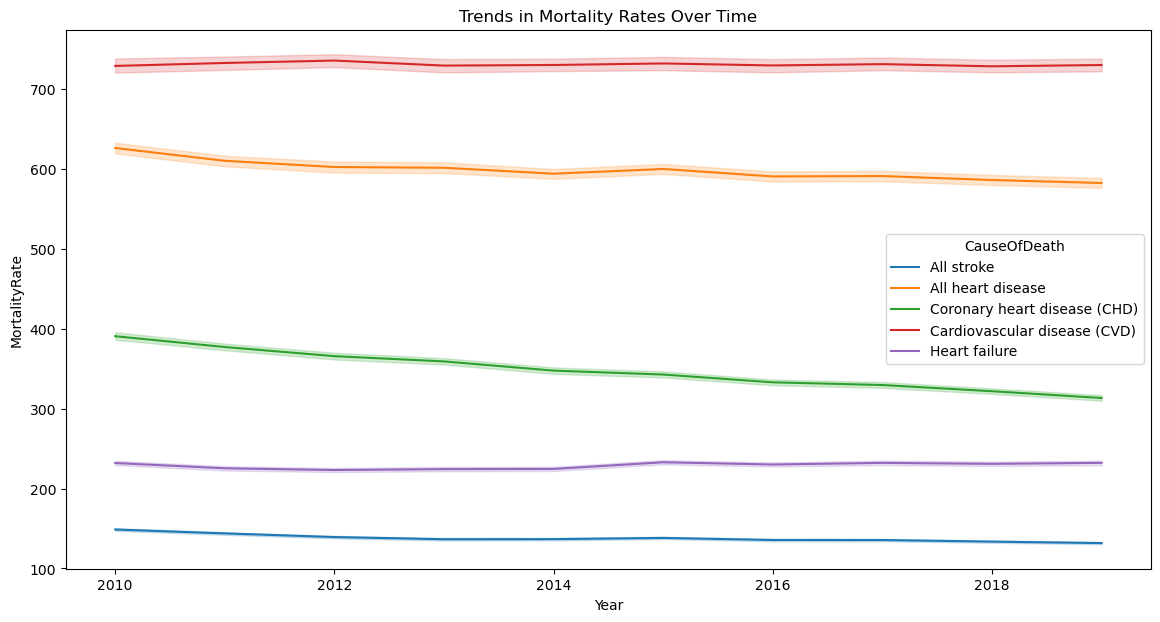

In [24]:
#@title Your Title Here Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=heart, x='Year', y='MortalityRate', hue='CauseOfDeath')
plt.title('Trends in Mortality Rates Over Time')
plt.show()



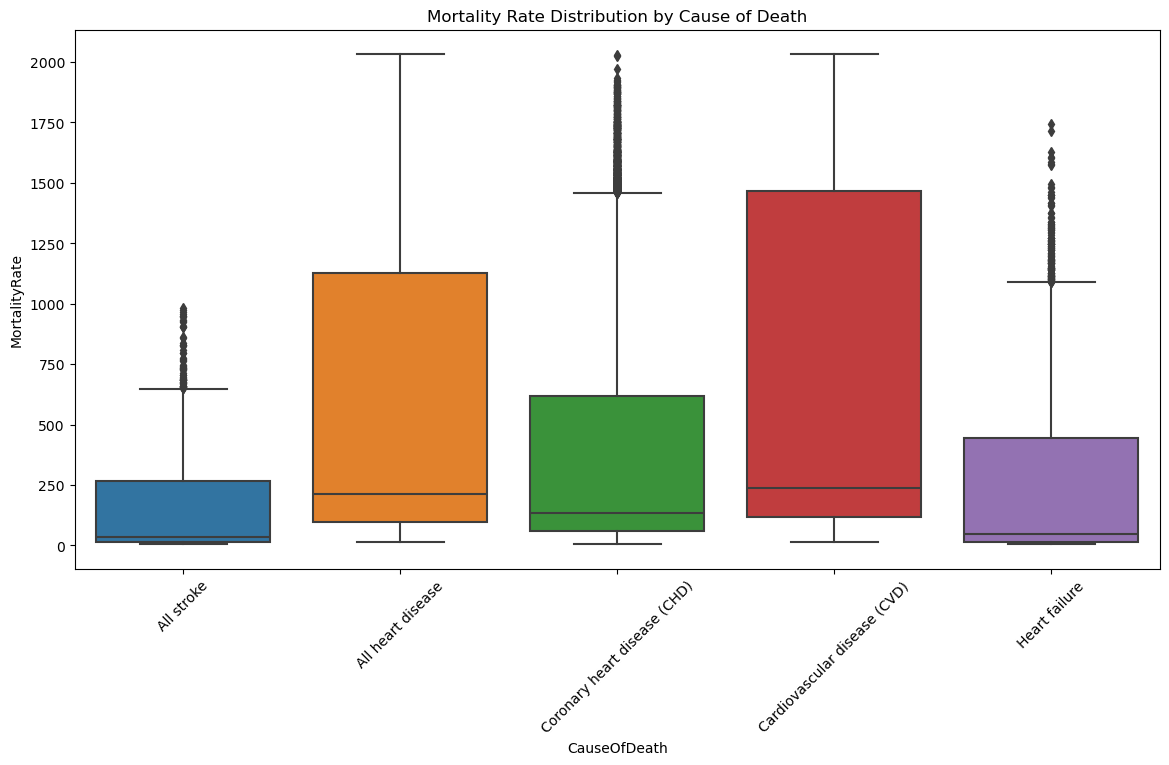

In [25]:
#@title Boxplot by Cause of Death
plt.figure(figsize=(14, 7))
sns.boxplot(data=heart, x='CauseOfDeath', y='MortalityRate')
plt.title('Mortality Rate Distribution by Cause of Death')
plt.xticks(rotation=45)
plt.show()



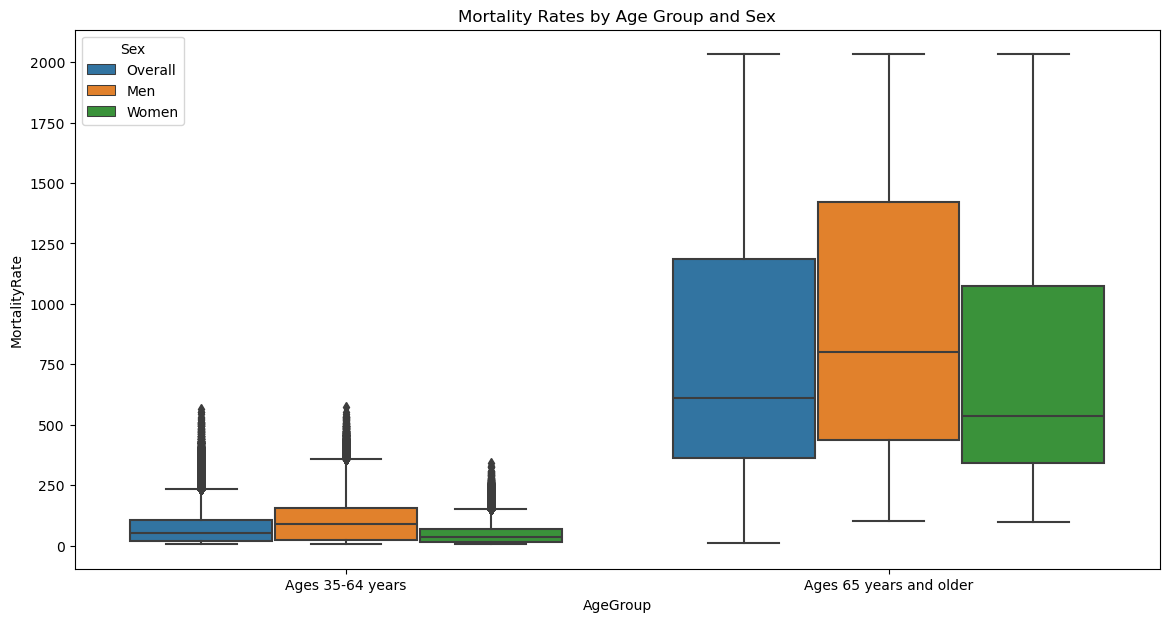

In [26]:
#@title Age and Gender Analysis
plt.figure(figsize=(14, 7))
sns.boxplot(data=heart, x='AgeGroup', y='MortalityRate', hue='Sex')
plt.title('Mortality Rates by Age Group and Sex')
plt.show()



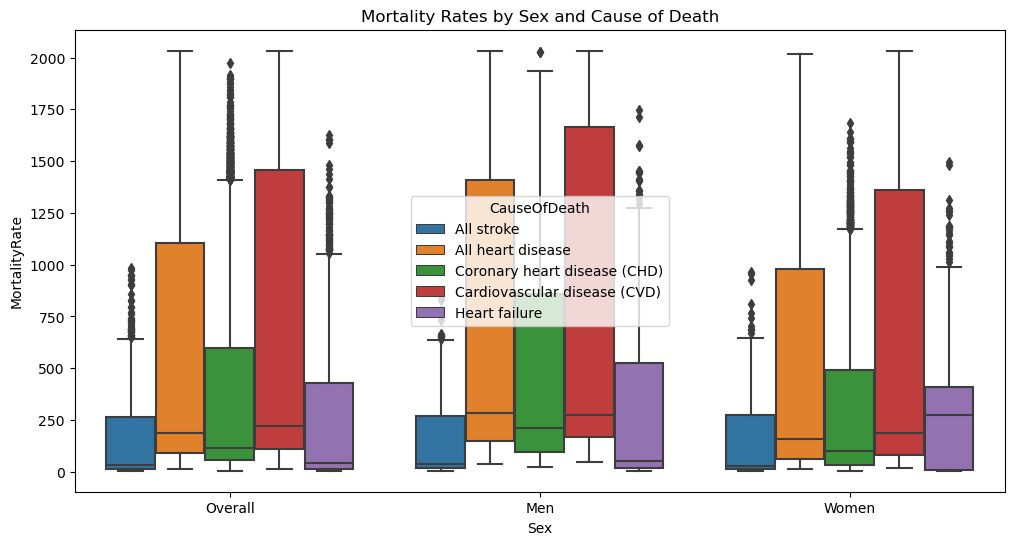

In [27]:
#@title Mortality Rates by Sex and Cause of Death
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=heart, x='Sex', y='MortalityRate', hue='CauseOfDeath')
plt.title('Mortality Rates by Sex and Cause of Death')
plt.show()


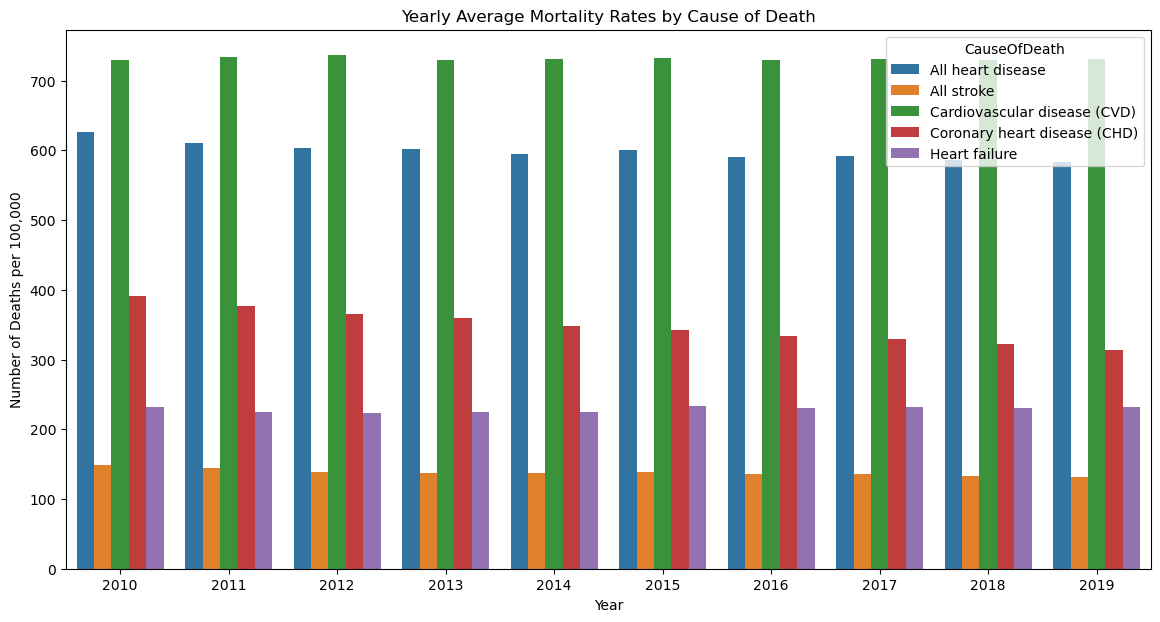

In [28]:
#@title Yearly Average Mortality Rates by Cause of Death
yearly_avg = heart.groupby(['Year', 'CauseOfDeath'])['MortalityRate'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_avg, x='Year', y='MortalityRate', hue='CauseOfDeath')
plt.title('Yearly Average Mortality Rates by Cause of Death')
plt.xlabel('Year')
plt.ylabel('Number of Deaths per 100,000')
plt.show()


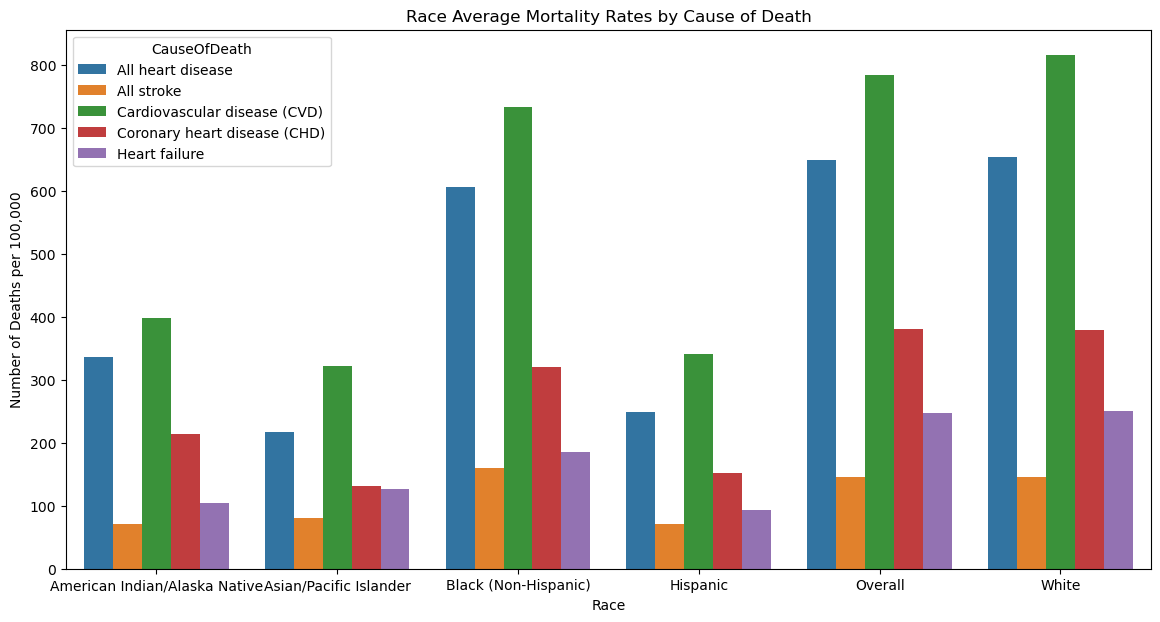

In [29]:
#@title Race Based Average Mortality Rates by Cause of Death
yearly_avg = heart.groupby(['Race', 'CauseOfDeath'])['MortalityRate'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_avg, x='Race', y='MortalityRate', hue='CauseOfDeath')
plt.title('Race Average Mortality Rates by Cause of Death')
plt.xlabel('Race')
plt.ylabel('Number of Deaths per 100,000')
plt.show()


In [30]:
#@title Seperate Cateogrical Features & Numerical Features
import numpy as np
cat_cols=heart.select_dtypes(include=['object']).columns
num_cols = heart.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['State', 'County', 'CauseOfDeath', 'AgeGroup', 'Race', 'Sex'], dtype='object')
Numerical Variables:
['Year', 'MortalityRate', 'ConfLow', 'ConfHigh', 'LocationID']


Year
Skew : -0.01


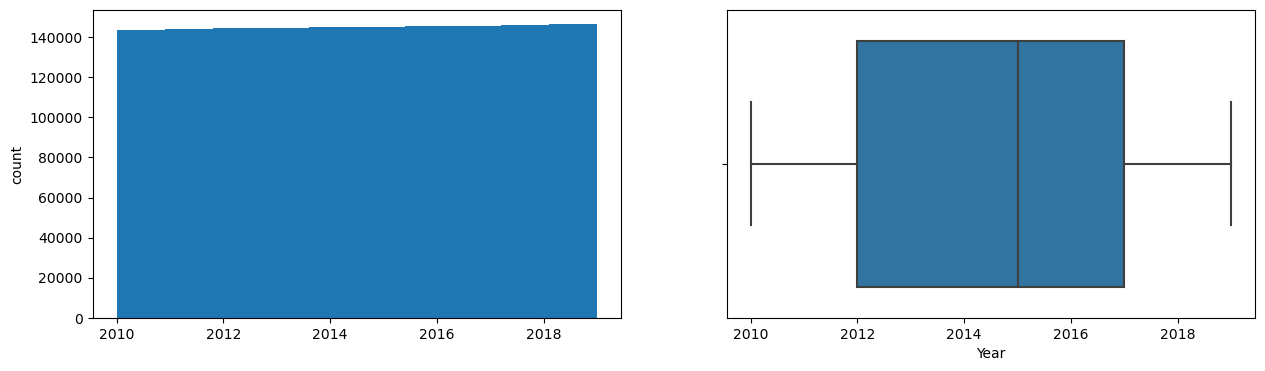

MortalityRate
Skew : 1.44


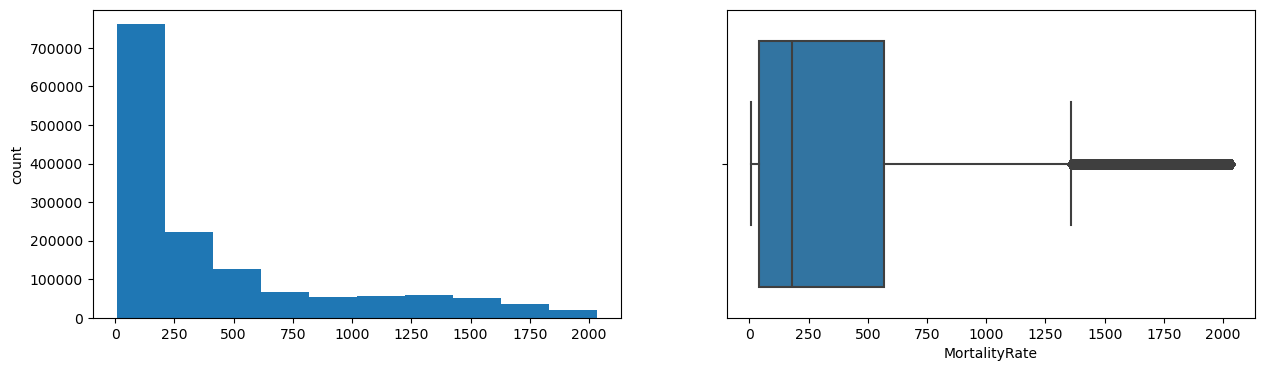

ConfLow
Skew : 1.5


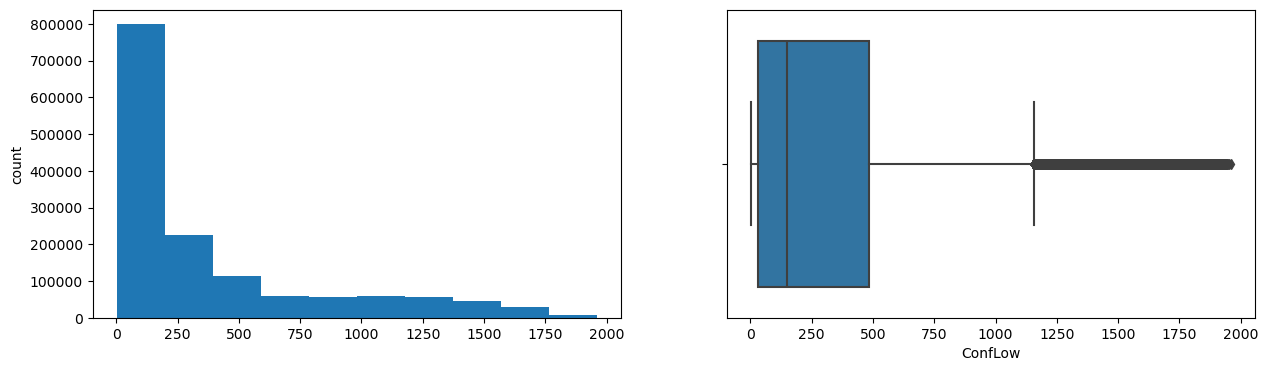

ConfHigh
Skew : 1.38


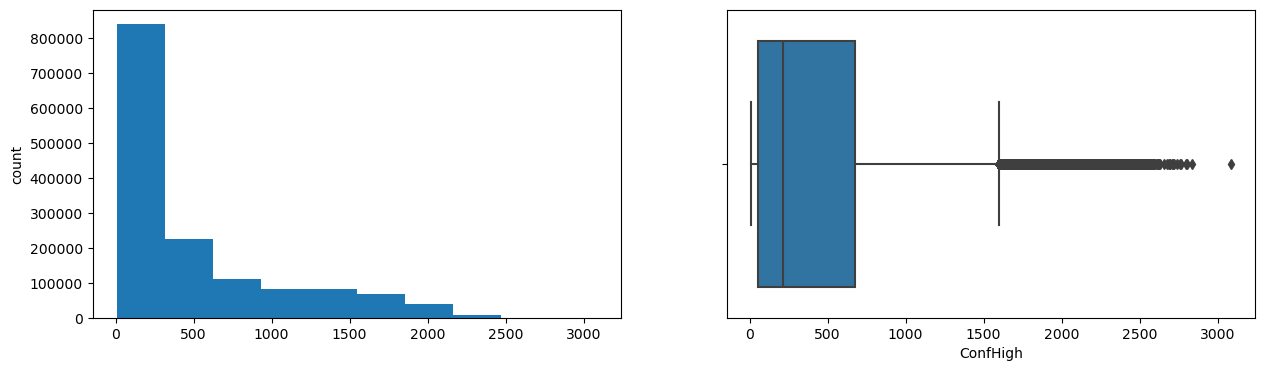

LocationID
Skew : -0.08


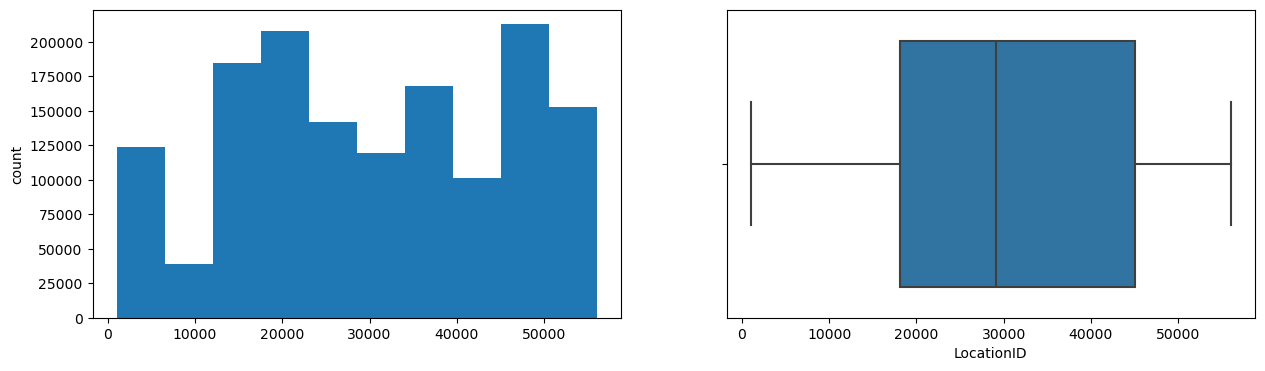

In [31]:
#@title Display skewness of each numerical attribute
for col in num_cols:
    print(col)
    print('Skew :', round(heart[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    heart[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=heart[col])
    plt.show()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/wx/yxss64053pn1gny__4jzngg80000gp/T/ipykernel_73350/719969925.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


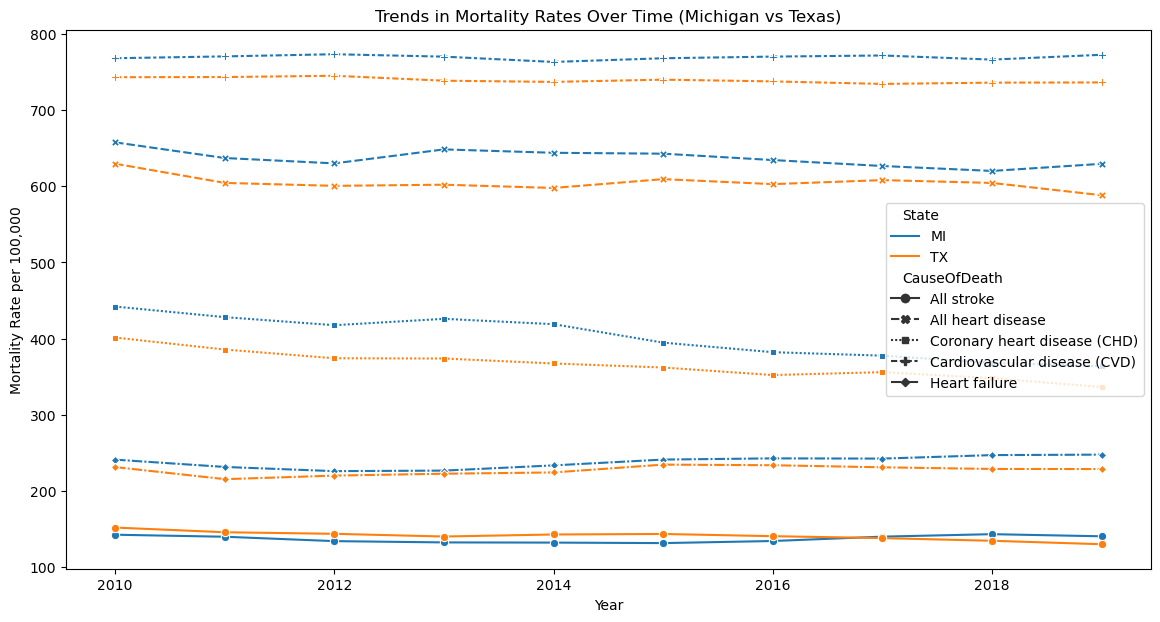

In [94]:
#Pres. visualizations start here
# Filter the data for Michigan and Texas
michigan_texas_data = heart[heart['State'].isin(['MI', 'TX'])]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=michigan_texas_data, 
    x='Year', 
    y='MortalityRate', 
    hue='State', 
    style='CauseOfDeath', 
    markers=True,   # Add markers at data points
    ci=None         # Remove the confidence interval (shading)
)
plt.title('Trends in Mortality Rates Over Time (Michigan vs Texas)')
plt.ylabel('Mortality Rate per 100,000')
plt.show()

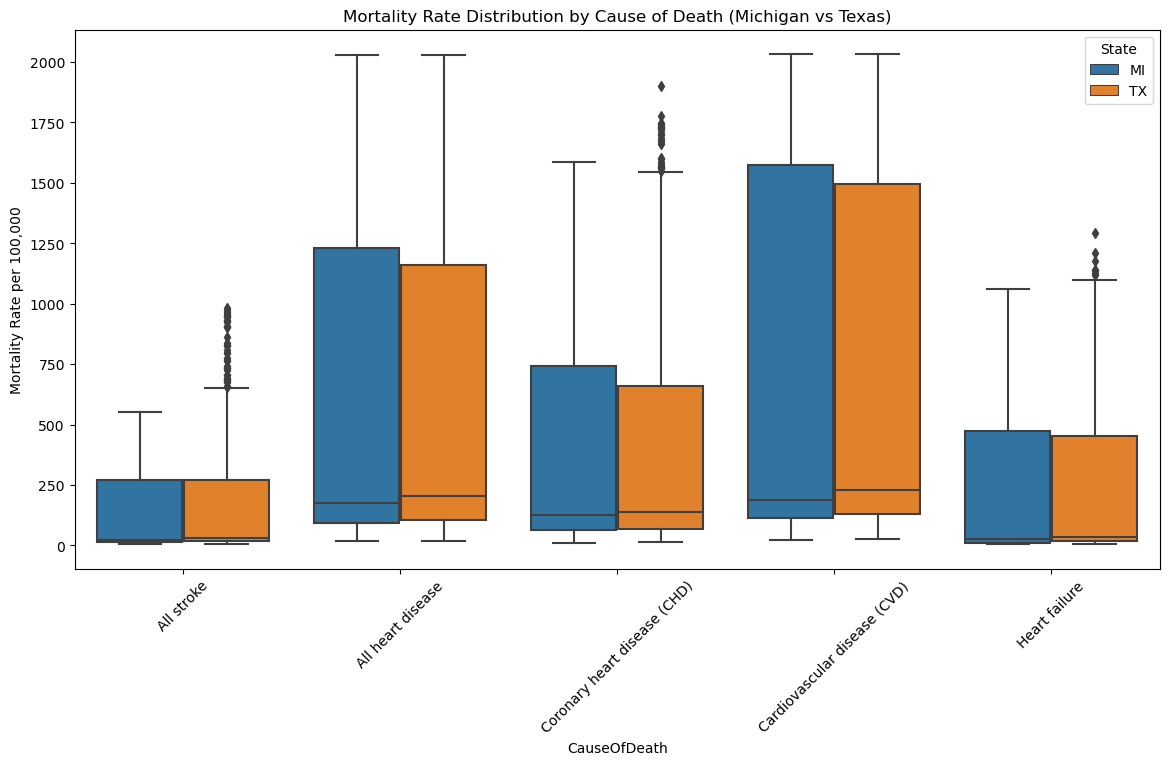

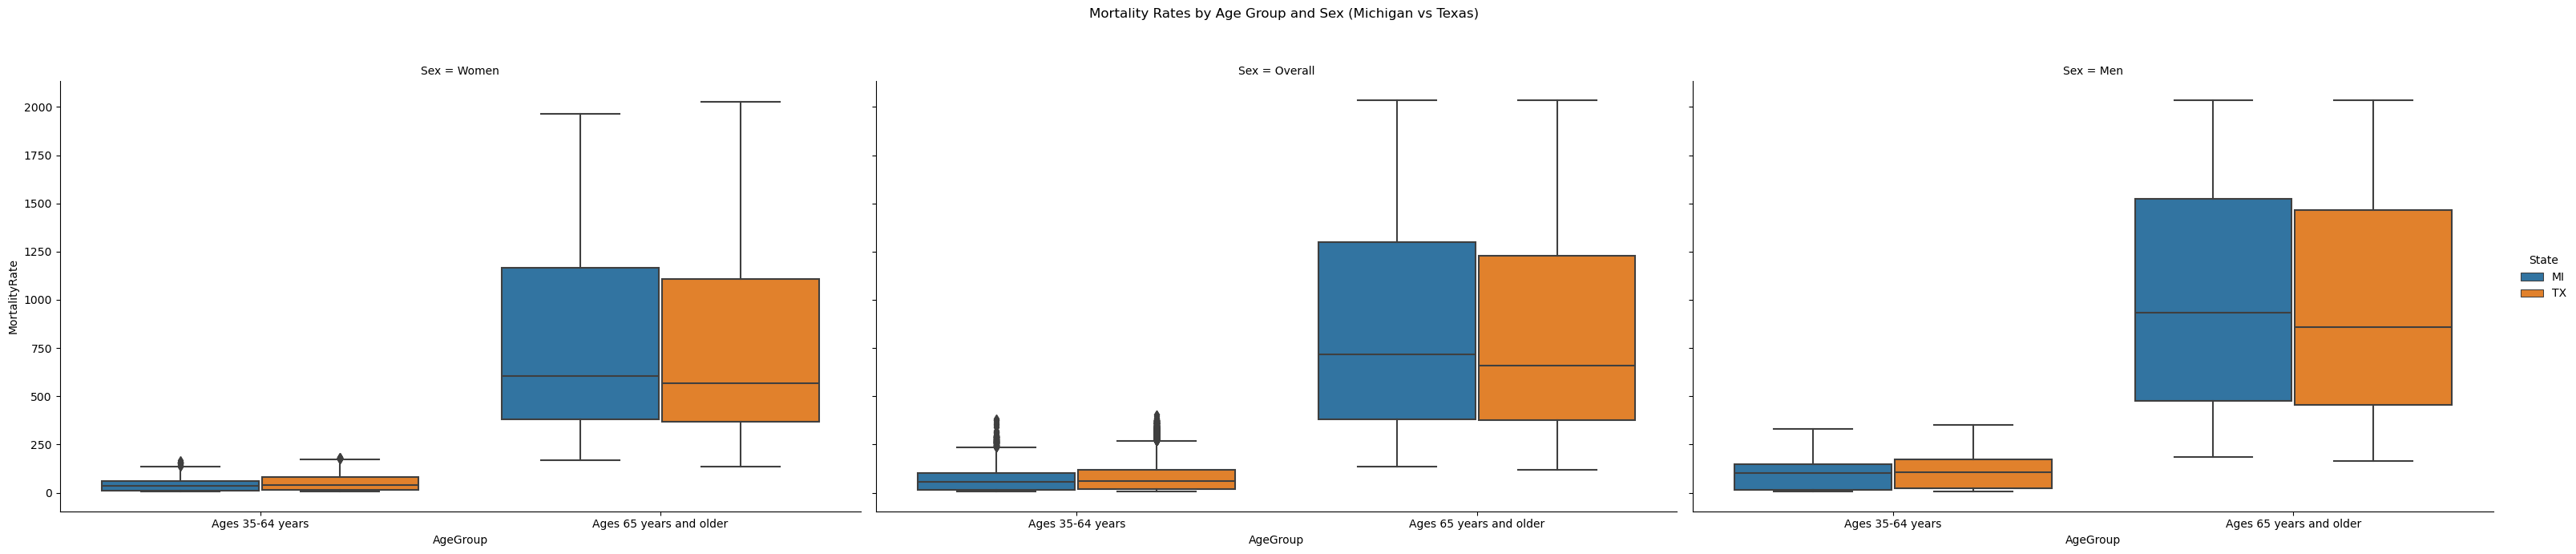

In [84]:
# Use sns.catplot to create separate plots for each 'Sex'
sns.catplot(data=michigan_texas_data, x='AgeGroup', y='MortalityRate', hue='State', col='Sex', kind='box', height=7, aspect=1.5)
plt.subplots_adjust(top=0.85)  # Adjust title spacing
plt.suptitle('Mortality Rates by Age Group and Sex (Michigan vs Texas)')
plt.show()

/var/folders/wx/yxss64053pn1gny__4jzngg80000gp/T/ipykernel_73350/1802650816.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=yearly_avg_state, x='Year', y='MortalityRate', hue='State', ci=None)


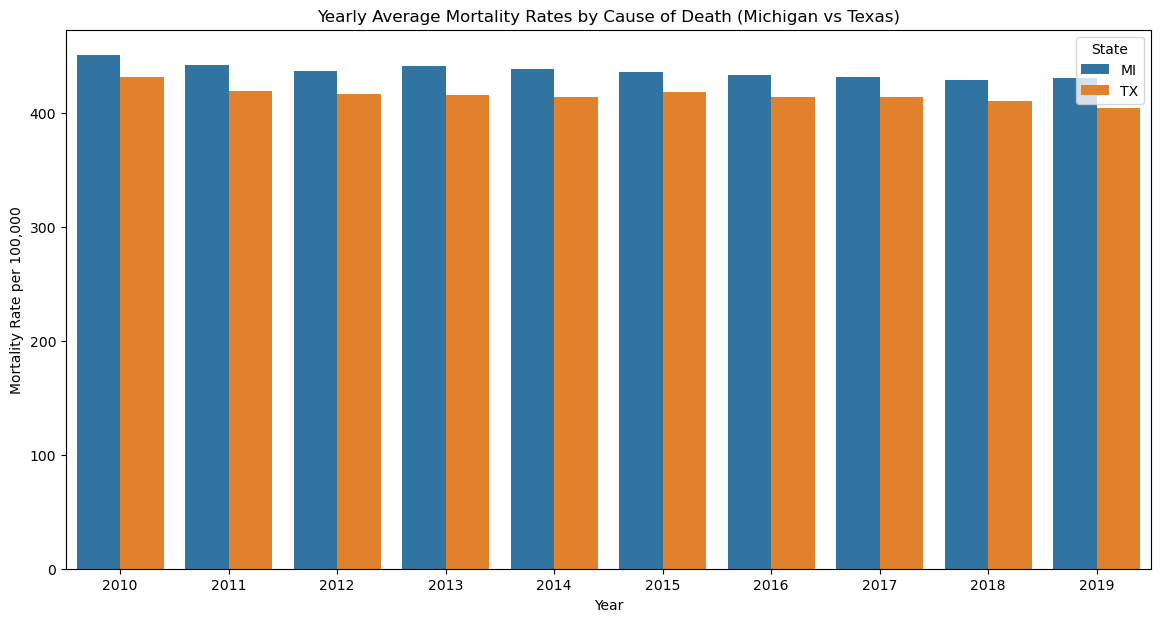

In [86]:
yearly_avg_state = michigan_texas_data.groupby(['Year', 'CauseOfDeath', 'State'])['MortalityRate'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_avg_state, x='Year', y='MortalityRate', hue='State', ci=None)
plt.title('Yearly Average Mortality Rates by Cause of Death (Michigan vs Texas)')
plt.ylabel('Mortality Rate per 100,000')
plt.show()

/var/folders/wx/yxss64053pn1gny__4jzngg80000gp/T/ipykernel_73350/2350837129.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=race_avg_state, x='Race', y='MortalityRate', hue='State', ci=None)


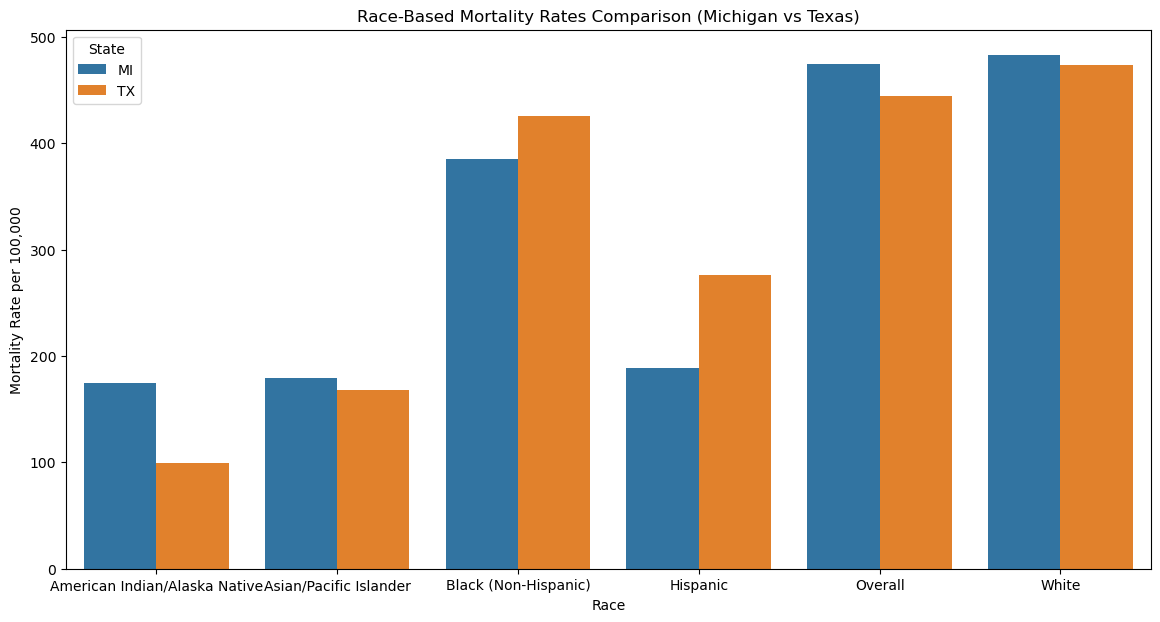

In [88]:
race_avg_state = michigan_texas_data.groupby(['Race', 'CauseOfDeath', 'State'])['MortalityRate'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=race_avg_state, x='Race', y='MortalityRate', hue='State', ci=None)
plt.title('Race-Based Mortality Rates Comparison (Michigan vs Texas)')
plt.ylabel('Mortality Rate per 100,000')
plt.show()